In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog

In [12]:
def bounding_box_naive(points):
    """returns a list containing the bottom left and the top right 
    points in the sequence
    Here, we use min and max four times over the collection of points
    """
    

    top_left_x = min(point[0][0] for point in points)
    top_left_y = min(point[0][1] for point in points)
    bot_right_x = max(point[0][0] for point in points)
    bot_right_y = max(point[0][1] for point in points)

    center_x = (top_left_x+bot_right_x)/2
    center_y = (top_left_y+bot_right_y)/2
     
    return [center_x,center_y,bot_right_x-top_left_x,bot_right_y-top_left_y]
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))
feature_params = dict( maxCorners = 20,
                       qualityLevel = 0.2,
                       minDistance = 7,
                       blockSize = 7 )

[137.5, 210.0, 201.0, 116.0]
37 238 152 268


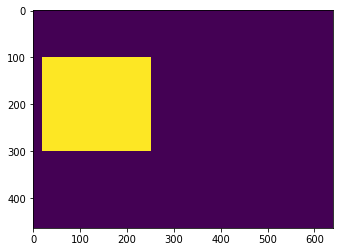

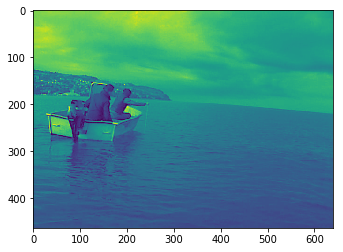

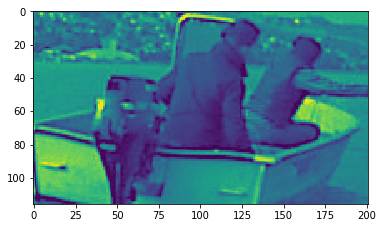

In [13]:
img = cv.imread('../modd/00150.jpg')

frame_grey = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
mask = np.zeros(frame_grey.shape, dtype = "uint8")
cv.rectangle(mask, (20, 100), (250,300), (255, 255, 255), -1)
plt.imshow(mask)
p0 = cv.goodFeaturesToTrack(frame_grey,mask=mask,  **feature_params)
plt.figure()
plt.imshow(frame_grey)
plt.figure()
box = bounding_box_naive(p0)
print(box)
print(int(box[0]-(box[2]/2)),int(box[0]+(box[2]/2)),int(box[1]-(box[3]/2)),int(box[1]+(box[3]/2)))
new_mod= frame_grey[int(box[1]-(box[3]/2)):int(box[1]+(box[3]/2)),int(box[0]-(box[2]/2)):int(box[0]+(box[2]/2))]
plt.imshow(new_mod)

In [14]:
x= hog(new_mod,feature_vector=True)

In [11]:
hog??

In [ ]:
next_frame = cv.imread('../modd/00170.jpg')
next_frame_grey = cv.cvtColor(next_frame,cv.COLOR_BGR2GRAY)
plt.imshow(next_frame_grey)
plt.figure()
niente = next_frame_grey[150:300,50:300]
plt.imshow(niente)
new_niente = cv.resize(niente,(int(new_mod.shape[1]),int(new_mod.shape[0])))
plt.figure()
plt.imshow(new_niente)

In [5]:
y = hog(new_niente,feature_vector=True)

NameError: name 'new_niente' is not defined

In [6]:
dist = np.linalg.norm(x-y)
print(dist)

NameError: name 'x' is not defined

In [7]:
hog??